In [21]:
# Imports
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [22]:
# Loading the Data
myopia = pd.read_csv('Resources/myopia.csv')
print(myopia.info())
print(myopia.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB
None
   AGE  SPHEQ         AL    ACD     LT    VCD  SPORTHR  READHR  COMPHR  \
0    6 -0.052  21.889999  3.690  3.498  14.70       45       8       0   
1    6  0.

In [23]:
# #Preparing Data

# # Split the data into X_train, X_test, y_train, y_test
# x = myopia.drop('MYOPIA', axis=1)

# # create labels set y by using the loan_status column
# y = myopia['MYOPIA']

# # split the data into training and testing datasets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [24]:
#Prepairing data

# Drop MYOPIA column
myopia_data_temp = myopia.drop("MYOPIC", axis=1)



# Standardize the data
scaler = StandardScaler()
myopia_data = scaler.fit_transform(myopia_data_temp)

# Convert the standardized data back into a Pandas DataFrame
myopia_data = pd.DataFrame(myopia_data, columns = myopia_data_temp.columns)

In [29]:
# Dimentionality Reduction
from sklearn.decomposition import PCA

# Apply PCA to the standardized myopia data
pca = PCA(n_components=.90)
myopia_data_pca = pca.fit_transform(myopia_data)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance)

[0.77404852 0.20768858]


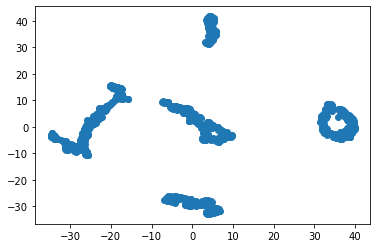

In [33]:
# t-SNE
tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(myopia_data_pca)
tsne_df = pd.DataFrame(tsne_features)

# Prepare to plot the dataset

# The first column of transformed features
tsne_df['x'] = tsne_features[:,0]

# The second column of transformed features
tsne_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

c:\Users\kyleh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


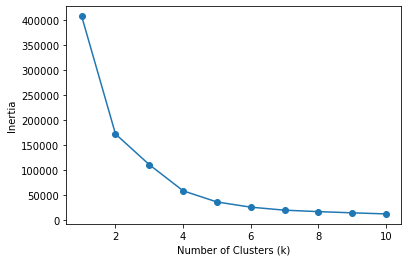

In [34]:
# Elbow
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(myopia_data_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

The patients can definitely be clustered. 

Four clusters would be the best, as more than that has diminishing results.
There is evidence to support five clusters, but that becomes a question of preformance and what the data will be used for. If it would significantly affect the time the process takes, the results would likely not provide enough benifit over using four clusters to warrent it. 